In [1]:
import pandas as pd
import matplotlib.pyplot as plt
whoopHRdf = pd.read_parquet('whoopHRdf.parquet.gzip') 


Text(0.5, 0, 'BPM')

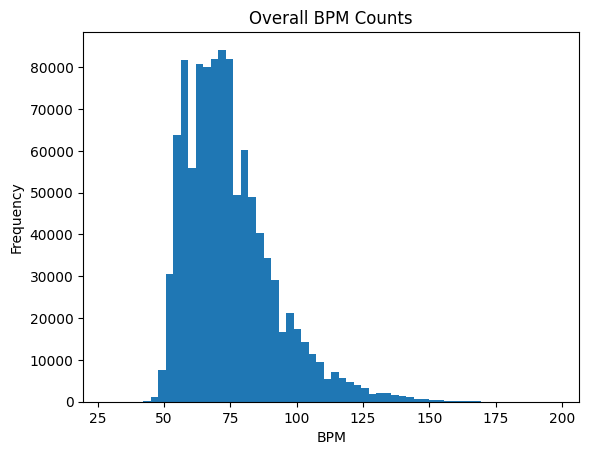

In [2]:
ax = whoopHRdf.hr.plot.hist(bins=60, title="Overall BPM Counts")
ax.set_xlabel("BPM")

In [3]:
whoopHRdf = whoopHRdf.sort_index()
timesSeries = pd.Series(whoopHRdf.index)
betweenMesures = ((timesSeries.shift(-1) - timesSeries)).astype('timedelta64[s]')
betweenMesures

0          2624.0
1           980.0
2            60.0
3            60.0
4            97.0
            ...  
1045314      60.0
1045315      60.0
1045316      60.0
1045317      60.0
1045318       NaN
Length: 1045319, dtype: float64

In [4]:
whoopHRdf["timeToNextReading"] = pd.Series(index=whoopHRdf.index, data=betweenMesures.values)
betweenMesures = betweenMesures.dropna()
whoopHRdf = whoopHRdf.dropna()
whoopHRdf

,hr,timeToNextReading
2022-04-11 06:01:37.722000+00:00,62,2624.0
2022-04-11 06:45:22.049000+00:00,62,980.0
2022-04-11 07:01:42.444000+00:00,62,60.0
2022-04-11 07:02:43.006000+00:00,63,60.0
2022-04-11 07:03:43.703000+00:00,65,97.0
...,...,...
2024-05-11 01:43:57.859000+00:00,84,60.0
2024-05-11 01:44:58.421000+00:00,67,60.0
2024-05-11 01:45:58.984000+00:00,72,60.0
2024-05-11 01:46:59.546000+00:00,72,60.0


In [5]:
whoopHRdf["timeToNextReading"].describe()

count    1.045318e+06
mean     6.232357e+01
std      3.664034e+02
min      0.000000e+00
25%      6.000000e+01
50%      6.000000e+01
75%      6.000000e+01
max      2.099600e+05
Name: timeToNextReading, dtype: float64

Text(0.5, 0, 'Interval (sec)')

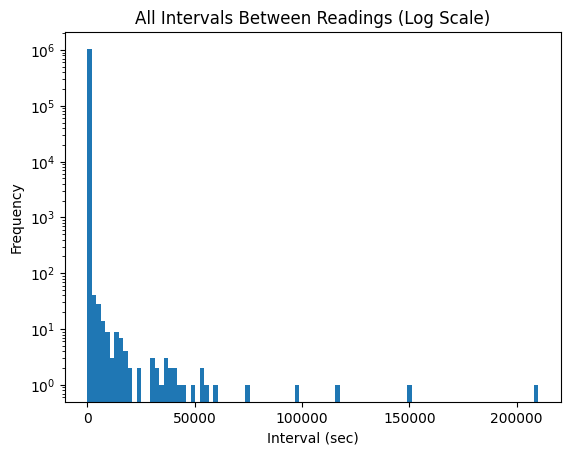

In [6]:
ax = betweenMesures.plot.hist(bins=100, log=True, title="All Intervals Between Readings (Log Scale)")
ax.set_xlabel("Interval (sec)")

Text(0.5, 0, 'Interval (sec)')

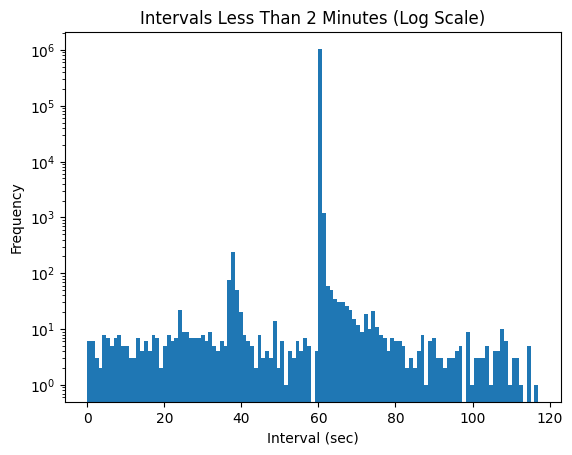

In [9]:
ax = betweenMesures.loc[betweenMesures<120].plot.hist(bins=119, log=True, title="Intervals Less Than 2 Minutes (Log Scale)")
ax.set_xlabel("Interval (sec)")

Text(0.5, 0, 'Interval (sec)')

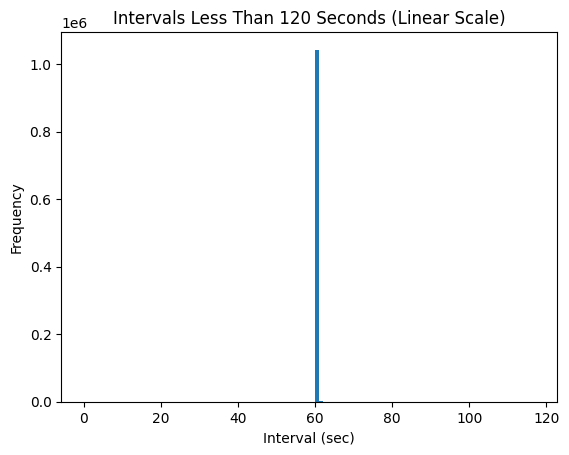

In [10]:
ax = betweenMesures.loc[betweenMesures<120].plot.hist(bins=119, title="Intervals Less Than 120 Seconds (Linear Scale)")
ax.set_xlabel("Interval (sec)")